Oasis Infobyte

Task 2: Unemployment Analysis with Python

Name : SIDDHARTH SHENDE 

Batch : SEPTEMBER Phase 1 OIBSIP


In [28]:
#Importing the libraris  
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [29]:
## Load the datasett
data = pd.read_csv("Unemployment in India.csv")

print("First few rows of the dataset:")
print(data.head())

print("Missing values:")
print(data.isnull().sum())

First few rows of the dataset:
           Region         Date  Frequency  Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                             3.65   
1  Andhra Pradesh   30-06-2019    Monthly                             3.05   
2  Andhra Pradesh   31-07-2019    Monthly                             3.75   
3  Andhra Pradesh   31-08-2019    Monthly                             3.32   
4  Andhra Pradesh   30-09-2019    Monthly                             5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                                     43.97  Rural  
4           12256762.0                                     44.68  Rural  
Missing values:
Region                                  

In [30]:
# Dropping rows with missing values
data = data.dropna()

# Data preprocessing
data_encoded = pd.get_dummies(data, drop_first=True)
X = data_encoded.drop('Estimated Unemployment Rate (%)', axis=1)
y = data_encoded['Estimated Unemployment Rate (%)']


In [31]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

#Training the model
regressor = LinearRegression()
regressor.fit(X_train_poly, y_train)
# Predictions
y_pred = regressor.predict(X_test_poly)

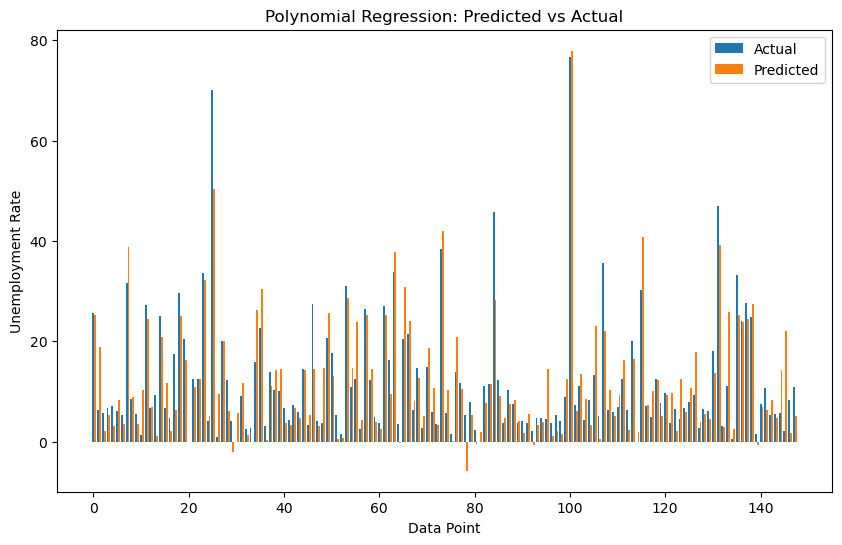

In [32]:
# Bar plot of predicted vs actual values
y_pred = poly_model.predict(X_test)
plt.figure(figsize=(10, 6))
plt.bar(np.arange(len(y_test)), y_test, width=0.4, align='center', label='Actual')
plt.bar(np.arange(len(y_pred)) + 0.4, y_pred, width=0.4, align='center', label='Predicted')
plt.xlabel('Data Point')
plt.ylabel('Unemployment Rate')
plt.title('Polynomial Regression: Predicted vs Actual')
plt.legend()
plt.show()


In [33]:
# Calculation of MSE and R2 scores
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Polynomial Regression:")
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Polynomial Regression:
Mean Squared Error: 31.46000118423664
R-squared: 0.7827013456724216
